# 1D Convolution example
In this notebook, we'll have a look to a simple implementation of the 1D example we've seen *visually*, understand how the **convolution** is performed by the layers and investigate a bit some of the parameters available to configure.

In [ ]:
# Packages for convolutions
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models

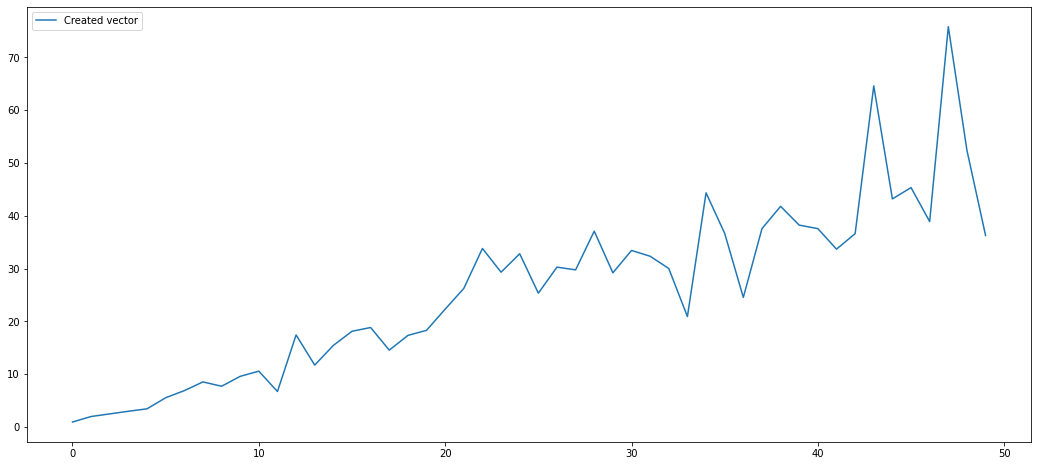

In [ ]:
# Create our vector and flatten it to reduce dimensionality
vector = np.array([i*np.random.normal(1, 0.2) + np.random.random(1) for i in range(50)])
vector = vector.flatten()

# Visualization
plt.figure(figsize = (18, 8))
plt.plot(vector, label = 'Created vector')
plt.legend()
plt.show()

### Layer convolution

[array([[[ 0.9411688 ]],

       [[-0.8278208 ]],

       [[-0.19380522]]], dtype=float32), array([0.], dtype=float32)]
(1, 48, 1)


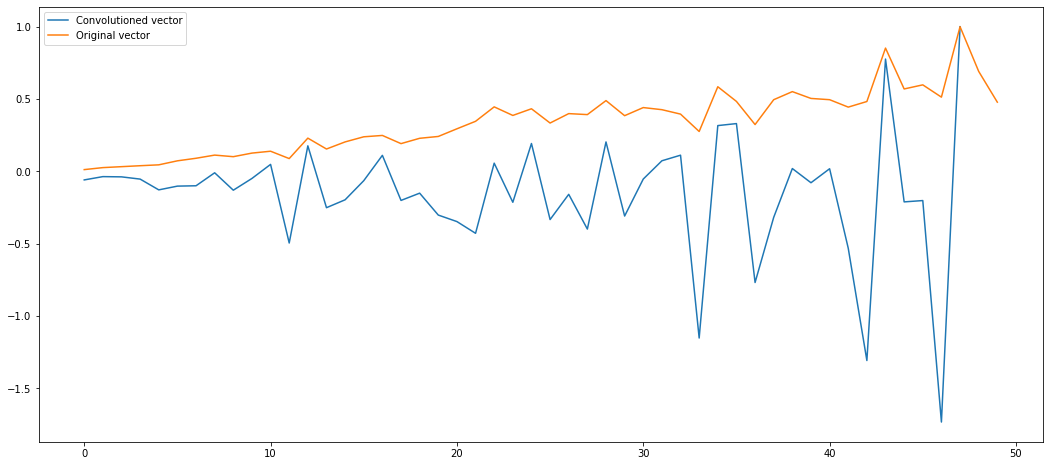

In [ ]:
# Prepare the vector for the layer,requires 3 dimensions
vector = np.reshape(vector, (1, 50, 1))

# Extract the shape to define the convolution layer
input_shape = vector.shape[1:]

# Building our layer
layer = tf.keras.layers.Conv1D(1, 3, input_shape=input_shape)

# Convolute our input vector
output = layer(vector)

# Get kernel values
print('Kernel values:', layer.get_weights())

# Get output shape
print('Convoluted vector shape:', output.shape)

plt.figure(figsize = (18, 8))
plt.plot(output[0,:,0]/max(output[0,:,0]), label = 'Convolutioned vector')
plt.plot(vector[0,:,0]/max(vector[0,:,0]), label = 'Original vector')
plt.legend()
plt.show()

### Prepared layers for testing

In [ ]:

# All different initializers
# https://keras.io/api/layers/initializers/ 

# All different hyperparameters 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D 



# tf.keras.layers.Conv1D(1, 3, activation='relu',input_shape=input_shape[1:], kernel_initializer='random_normal')
# tf.keras.layers.Conv1D(1, 3, activation='relu',input_shape=input_shape[1:], kernel_initializer='random_normal', padding = 'same')
# tf.keras.layers.Conv1D(1, 3, activation='relu',input_shape=input_shape[1:])
# tf.keras.layers.Conv1D(1, 3, activation='relu',input_shape=input_shape[1:], kernel_initializer=tf.keras.initializers.RandomNormal(mean=5, stddev=0.05, seed=None), padding = 'same')

### 1D Convolution as a model

[array([[[ 0.03651476]],

       [[ 0.1893382 ]],

       [[-0.08498669]]], dtype=float32), array([0.], dtype=float32)]
(1, 48, 1)


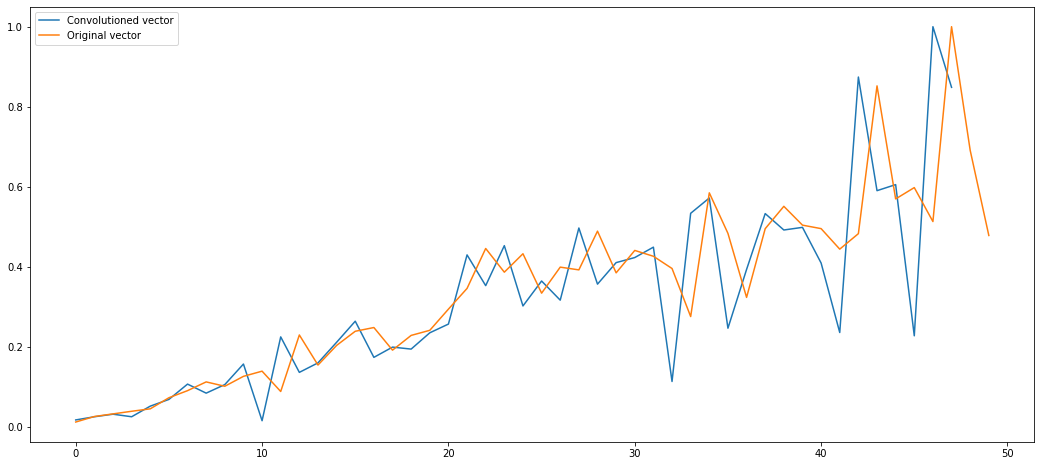

In [ ]:
# Prepare the vector for the layer,requires 3 dimensions
vector = np.reshape(vector, (1, 50, 1))

# Extract the shape to define the convolution layer
input_shape = vector.shape[1:]

model = models.Sequential()
model.add(tf.keras.layers.Conv1D(1, 3, activation='relu',input_shape=input_shape))

### Alternative model with more layers than 1
# model = Sequential()
# model.add(tf.keras.layers.Conv1D(3, 3, activation='relu',input_shape=input_shape))
# model.add(tf.keras.layers.Conv1D(1, 3, activation='relu'))

y = model(vector)

plt.figure(figsize = (18, 8))
plt.plot(y[0,:,0]/max(y[0,:,0]), label = 'Convolutioned vector')
plt.plot(vector[0,:,0]/max(vector[0,:,0]), label = 'Original vector')
plt.legend()
plt.show()

# 2D Convolution examples

## Images
Creating samples for visualize different types of images and also to apply convolution in 2D.

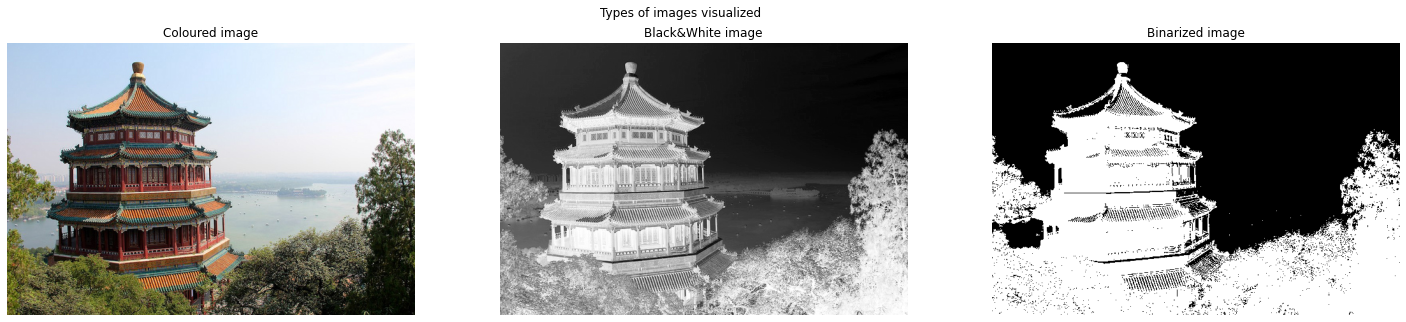

In [ ]:
# Packages
from sklearn.datasets import load_sample_images
from skimage import color
from skimage import io

# Loading the dataset
dataset = load_sample_images()

# Get the first image: coloured one (3D)
first_img_data = dataset.images[0]

# Transforming to black&white image (1D)
imgGray = color.rgb2gray(first_img_data)

# Binarized image
flat_gray = imgGray.flatten()
threshold = np.average(flat_gray)
# Coding loop
flat_gray_bw = [1 if value >= threshold else 0 for value in flat_gray]
# Recover initial shape
gray_bw = np.reshape(flat_gray_bw, imgGray.shape)

## Visualization time
# Visualize the subset
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 5))
fig.suptitle('Types of images visualized')

ax1.imshow(first_img_data)
ax1.set_title('Coloured image')
ax1.axis('off')
ax2.imshow(imgGray, cmap = 'gray_r')
ax2.set_title('Black&White image')
ax2.axis('off')
ax3.imshow(gray_bw, cmap = 'gray_r')
ax3.set_title('Binarized image')
ax3.axis('off')
plt.show()



## Convolution
In order to apply convolution we have to specify image size and dimensions, transforming images if needed. <br><br>
As a second step, define layers/models and convolute the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


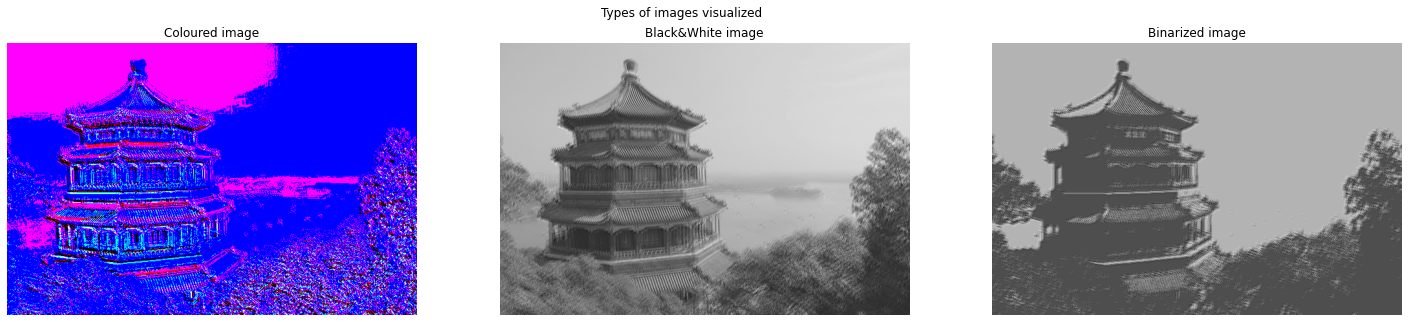

In [ ]:
# Coloured image preparation
first_img_resh = np.reshape(first_img_data, (1, 427, 640, 3))

# Black&White image preparation
resh_grayscale = np.reshape(imgGray, (1, 427, 640, 1))

# Binary image preparation
bin_image = np.reshape(gray_bw, (1, 427, 640, 1))

# Defining models 
model_col = models.Sequential()
# model_col.add(layers.Conv2D(3, 3, activation='relu', input_shape=(427, 640, 3)))
model_col.add(layers.Conv2D(3, 7, input_shape=(427, 640, 3)))


model_bw = models.Sequential()
# model_bw.add(layers.Conv2D(1, 3, activation='relu', input_shape=(427, 640, 1)))
model_bw.add(layers.Conv2D(1, 7, input_shape=(427, 640, 1)))

model_bin = models.Sequential()
# model_bin.add(layers.Conv2D(1, 3, activation='relu', input_shape=(427, 640, 1)))
model_bin.add(layers.Conv2D(1, 7, input_shape=(427, 640, 1)))

# Convolute images through models
conv_col = model_col(first_img_resh)
conv_bw = model_bw(resh_grayscale)
conv_bin = model_bin(bin_image)

# Visualizations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 5))
fig.suptitle('Types of images visualized')

ax1.imshow(conv_col[0,:,:,:])
ax1.set_title('Coloured image')
ax1.axis('off')
ax2.imshow(conv_bw[0,:,:,0], cmap = 'gray_r')
ax2.set_title('Black&White image')
ax2.axis('off')
ax3.imshow(conv_bin[0,:,:,0], cmap = 'gray_r')
ax3.set_title('Binarized image')
ax3.axis('off')
plt.show()

### Coloured image by dimensions


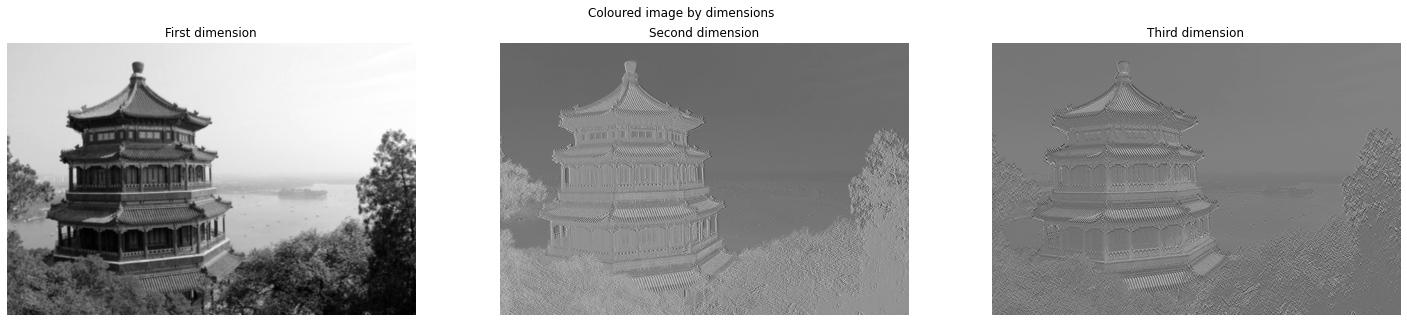

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 5))
fig.suptitle('Coloured image by dimensions')

ax1.imshow(conv_col[0,:,:,0], cmap = 'gray')
ax1.set_title('First dimension')
ax1.axis('off')
ax2.imshow(conv_col[0,:,:,1], cmap = 'gray')
ax2.set_title('Second dimension')
ax2.axis('off')
ax3.imshow(conv_col[0,:,:,2], cmap = 'gray')
ax3.set_title('Third dimension')
ax3.axis('off')
plt.show()

In [ ]:
print('Original image shape: ', first_img_resh.shape)
print('Convoluted image shape: ', conv_col.shape)

Original image shape:  (1, 427, 640, 3)
Convoluted image shape:  (1, 425, 638, 3)


### Digit convolution example

In [ ]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


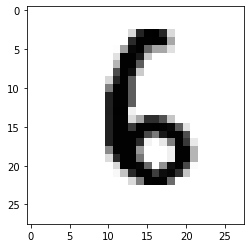

In [ ]:
# Display random sample
sample = trainX[np.random.randint(10000)]
plt.imshow(sample, cmap = 'gray_r')

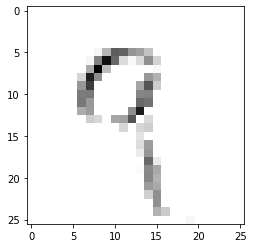

In [ ]:
# Building our model for convolute 
model_bw = models.Sequential()
model_bw.add(layers.Conv2D(1, 3, activation='relu', input_shape=(28, 28, 1)))
# model_bw.add(layers.Conv2D(1, 3, input_shape=(28, 28, 1)))

# Apply the convolution to the sample
conv = model_bw(np.reshape(sample, (1, 28, 28, 1)))

# Visualize results
plt.imshow(conv[0,:,:,0], cmap = 'gray_r')